# Trabajo Práctico Integrador

<center><img src='imagen_reporte.jpg' width=700></center>

## Análisis exploratorio

En este trabajo se analiza una estructura de datos que contiene calificaciones de alumnos y una serie de variables categóricas relativas a su vida personal y familiar (tales como género, estudios alcanzados por los padres, situación laboral, alimentación, grupo étnico al que pertenecen, etcétera). 

A partir del análisis exploratorio se responderán una serie de interrogantes, tales como: ¿hay alguna relación entre el promedio de notas obtenidas y el hecho de haber realizado el curso preparatorio?; ¿existe correspondencia entre el grupo étnico y el promedio de notas alcanzado?; ¿existe relación entre el promedio de notas obtenidas y el hecho de que los alumnos trabajen o no?; ¿tienen mayor promedio los alumnos cuyos padres han alcanzado un nivel de estudio posuniversitario (en este caso, un "master degree")?; ¿hay diferencias significativas en las calificaciones, teniendo en consideración el género de los estudiantes?

In [1]:
# colores Matplotlib (info útil para mí)
# https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py

In [2]:
# 1) IMPORTAR LAS LIBRERIAS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
# 2) CARGA DE DATOS EN EL DATAFRAME
df = pd.read_csv('/work/exams.csv')
df


,id,gender,race/ethnicity,parental level of education,lunch,employed,test preparation course,math score,physics score,chemistry score,algebra_score
0,10-5894942,male,group A,high school,standard,yes,completed,67.0,67.0,63.0,66.0
1,41-1676468,female,group D,some high school,free/reduced,no,none,40.0,59.0,55.0,51.0
2,64-6396924,male,group E,some college,free/reduced,no,none,59.0,60.0,50.0,56.0
3,35-2426788,male,group B,high school,standard,yes,none,77.0,78.0,68.0,74.0
4,60-9387304,male,group E,associate's degree,standard,yes,completed,78.0,73.0,68.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...
1013,82-7312119,male,group E,associate's degree,standard,yes,none,74.0,73.0,67.0,71.0
1014,45-3445439,male,group E,some college,free/reduced,no,none,78.0,84.0,77.0,80.0
1015,02-3651562,male,group A,some college,standard,no,completed,78.0,78.0,74.0,77.0
1016,05-5203587,female,group B,some college,standard,yes,none,75.0,76.0,81.0,77.0


In [4]:
# Ver las primeras 5 filas (o la cantidad que indiquemos como argumento)
df.head(6)

,id,gender,race/ethnicity,parental level of education,lunch,employed,test preparation course,math score,physics score,chemistry score,algebra_score
0,10-5894942,male,group A,high school,standard,yes,completed,67.0,67.0,63.0,66.0
1,41-1676468,female,group D,some high school,free/reduced,no,none,40.0,59.0,55.0,51.0
2,64-6396924,male,group E,some college,free/reduced,no,none,59.0,60.0,50.0,56.0
3,35-2426788,male,group B,high school,standard,yes,none,77.0,78.0,68.0,74.0
4,60-9387304,male,group E,associate's degree,standard,yes,completed,78.0,73.0,68.0,73.0
5,67-3666190,female,group D,high school,standard,yes,none,63.0,77.0,76.0,72.0


In [5]:
# Ver las últimas filas
df.tail()

,id,gender,race/ethnicity,parental level of education,lunch,employed,test preparation course,math score,physics score,chemistry score,algebra_score
1013,82-7312119,male,group E,associate's degree,standard,yes,none,74.0,73.0,67.0,71.0
1014,45-3445439,male,group E,some college,free/reduced,no,none,78.0,84.0,77.0,80.0
1015,02-3651562,male,group A,some college,standard,no,completed,78.0,78.0,74.0,77.0
1016,05-5203587,female,group B,some college,standard,yes,none,75.0,76.0,81.0,77.0
1017,13-3347050,male,group D,some college,standard,no,completed,70.0,60.0,65.0,65.0


In [6]:
# Resumen estadístico
df.describe()

,math score,physics score,chemistry score,algebra_score
count,1011.000000,1011.000000,1011.000000,1011.000000
mean,66.480712,69.063304,67.789318,67.778437
std,15.326880,14.694107,15.559853,14.450680
min,13.000000,27.000000,23.000000,22.000000
25%,56.000000,60.000000,58.000000,59.000000
50%,67.000000,70.000000,68.000000,68.000000
75%,77.000000,79.000000,79.000000,78.000000
max,100.000000,100.000000,100.000000,100.000000


In [7]:
# 3) REVISAR LOS TIPOS DE DATOS
df.dtypes

id                              object
gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
employed                        object
test preparation course         object
math score                     float64
physics score                  float64
chemistry score                float64
algebra_score                  float64
dtype: object

In [8]:
# 4) ELIMINAR LOS DUPLICADOS
print(f'Original: {df.id.count()} filas')
duplicate_rows_df = df[df.duplicated()]
print(f'Cantidad de filas duplicadas: {duplicate_rows_df.id.count()}')

# Eliminar los duplicados
df = df.drop_duplicates()

Original: 1018 filas
Cantidad de filas duplicadas: 18


In [9]:
# Filas que tenemos después de eliminar los duplicados
print(f'Final: {df.id.count()} filas')

Final: 1000 filas


In [10]:
# ELIMINAR LAS COLUMNAS IRRELEVANTES
print(df.columns)
df = df.drop(['id'], axis=1)


Index(['id', 'gender', 'race/ethnicity', 'parental level of education',
       'lunch', 'employed', 'test preparation course', 'math score',
       'physics score', 'chemistry score', 'algebra_score'],
      dtype='object')


In [11]:
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'employed', 'test preparation course', 'math score', 'physics score',
       'chemistry score', 'algebra_score'],
      dtype='object')


In [12]:
# 6) RENOMBRAR LAS COLUMNAS
df = df.rename(columns = {
    "gender":"Gender",
    "race/ethnicity":"Ethnicity", 
    "parental level of education":"Parental level of education",
    "lunch":"Lunch", 
    "employed":"Employed", 
    "test preparation course":"Test preparation course", 
    "math score":"Math score",
    "physics score":"Physics score", 
    "chemistry score":"Chemistry score", 
    "algebra_score":"Algebra score",})
df.columns

Index(['Gender', 'Ethnicity', 'Parental level of education', 'Lunch',
       'Employed', 'Test preparation course', 'Math score', 'Physics score',
       'Chemistry score', 'Algebra score'],
      dtype='object')

In [13]:
# 7) ELIMINAR LOS VALORES PERDIDOS O FALSOS
# Encontrar los valores nulos
print(df.isnull().sum())

# Eliminar los valores perdidos
df = df.dropna()
print()

# Después de eliminar los nulos
print(df.isnull().sum())

Gender                         0
Ethnicity                      0
Parental level of education    0
Lunch                          0
Employed                       0
Test preparation course        0
Math score                     7
Physics score                  7
Chemistry score                7
Algebra score                  7
dtype: int64

Gender                         0
Ethnicity                      0
Parental level of education    0
Lunch                          0
Employed                       0
Test preparation course        0
Math score                     0
Physics score                  0
Chemistry score                0
Algebra score                  0
dtype: int64


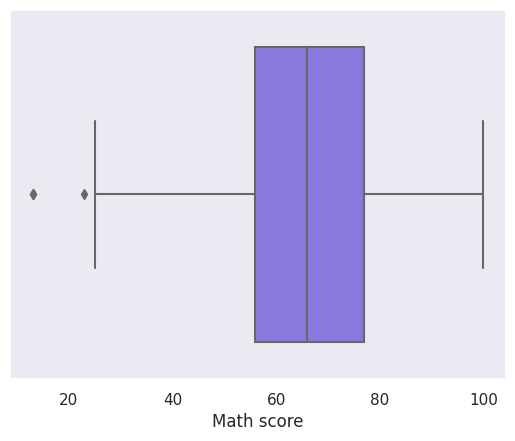

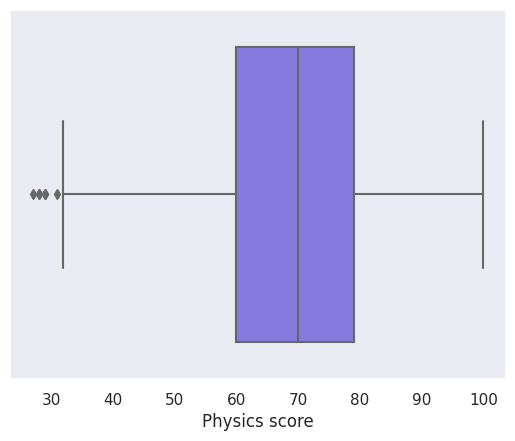

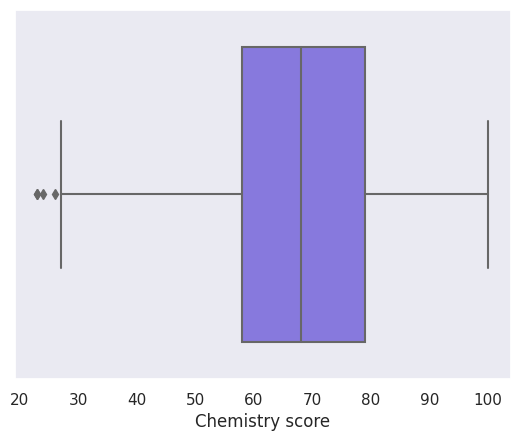

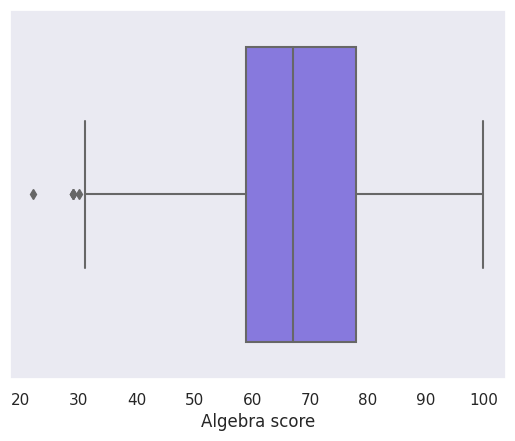

In [14]:
# 8) DETECTAR LOS OUTLIERS
sns.set(style='dark')
sns.boxplot(x=df['Math score'], color='mediumslateblue')
plt.show()
sns.boxplot(x=df['Physics score'], color='mediumslateblue')
plt.show()
sns.boxplot(x=df['Chemistry score'], color='mediumslateblue')
plt.show()
sns.boxplot(x=df['Algebra score'], color='mediumslateblue')
plt.show()

In [15]:
print(f'Antes: {df.Lunch.count()} filas\n')
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1 # Rango intercuartil
print(IQR)
df = df[~((df<(Q1-1.5 * IQR)) | (df>(Q3+1.5 * IQR))).any(axis=1)]
print(f'\nDespués: {df.Lunch.count()} filas')

Antes: 993 filas

Math score         21.0
Physics score      19.0
Chemistry score    21.0
Algebra score      19.0
dtype: float64

Después: 984 filas
/tmp/ipykernel_1373/3704891740.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df<(Q1-1.5 * IQR)) | (df>(Q3+1.5 * IQR))).any(axis=1)]
/tmp/ipykernel_1373/3704891740.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df<(Q1-1.5 * IQR)) | (df>(Q3+1.5 * IQR))).any(axis=1)]


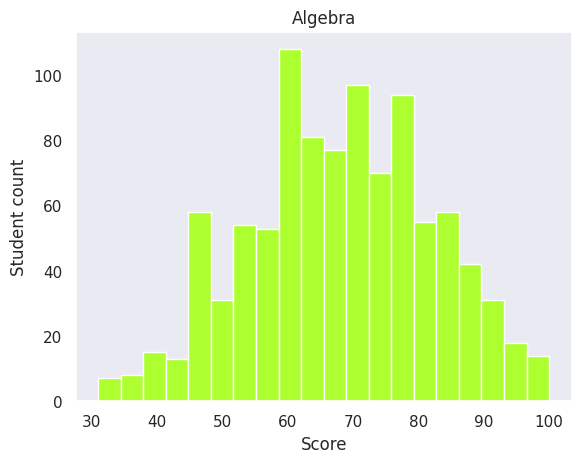

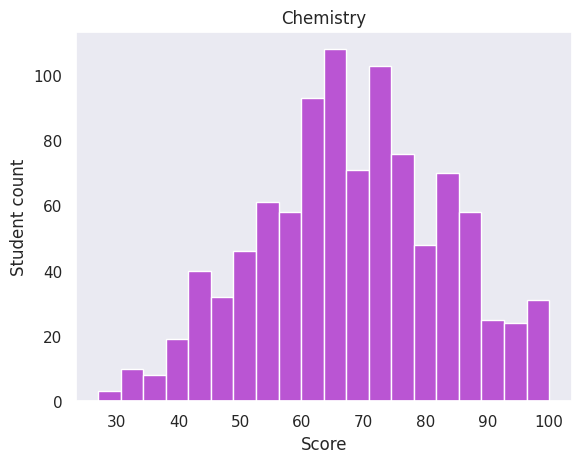

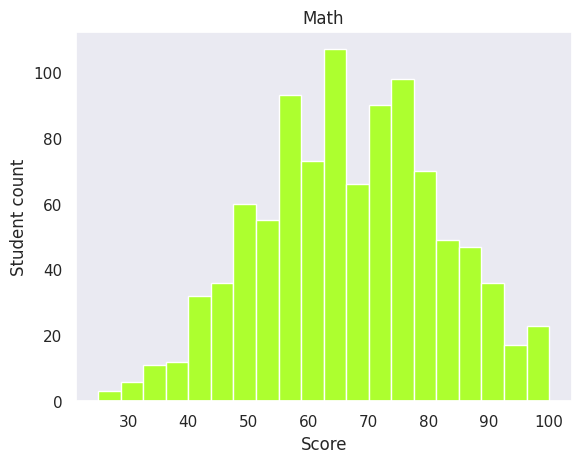

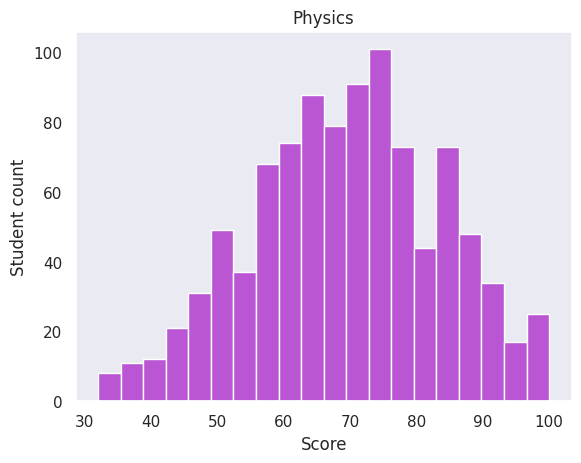

In [16]:
# 9) ENCONTRAR CORRELACIONES Y FRECUENCIAS 

# Para frecuencias (histogramas)
plt.hist(df['Algebra score'], bins=20, color='greenyellow')
plt.title('Algebra')
plt.ylabel('Student count')
plt.xlabel('Score')
plt.show()

plt.hist(df['Chemistry score'], bins=20, color='mediumorchid')
plt.title('Chemistry')
plt.ylabel('Student count')
plt.xlabel('Score')
plt.show()

plt.hist(df['Math score'], bins=20, color='greenyellow')
plt.title('Math')
plt.ylabel('Student count')
plt.xlabel('Score')
plt.show()

plt.hist(df['Physics score'], bins=20, color='mediumorchid')
plt.title('Physics')
plt.ylabel('Student count')
plt.xlabel('Score')
plt.show()



In [17]:
# Correlaciones entre los datos (mapas de calor)
c = df.corr()
print(c)

                 Math score  Physics score  Chemistry score  Algebra score
Math score         1.000000       0.812055         0.798312       0.916674
Physics score      0.812055       1.000000         0.951536       0.968358
Chemistry score    0.798312       0.951536         1.000000       0.964652
Algebra score      0.916674       0.968358         0.964652       1.000000


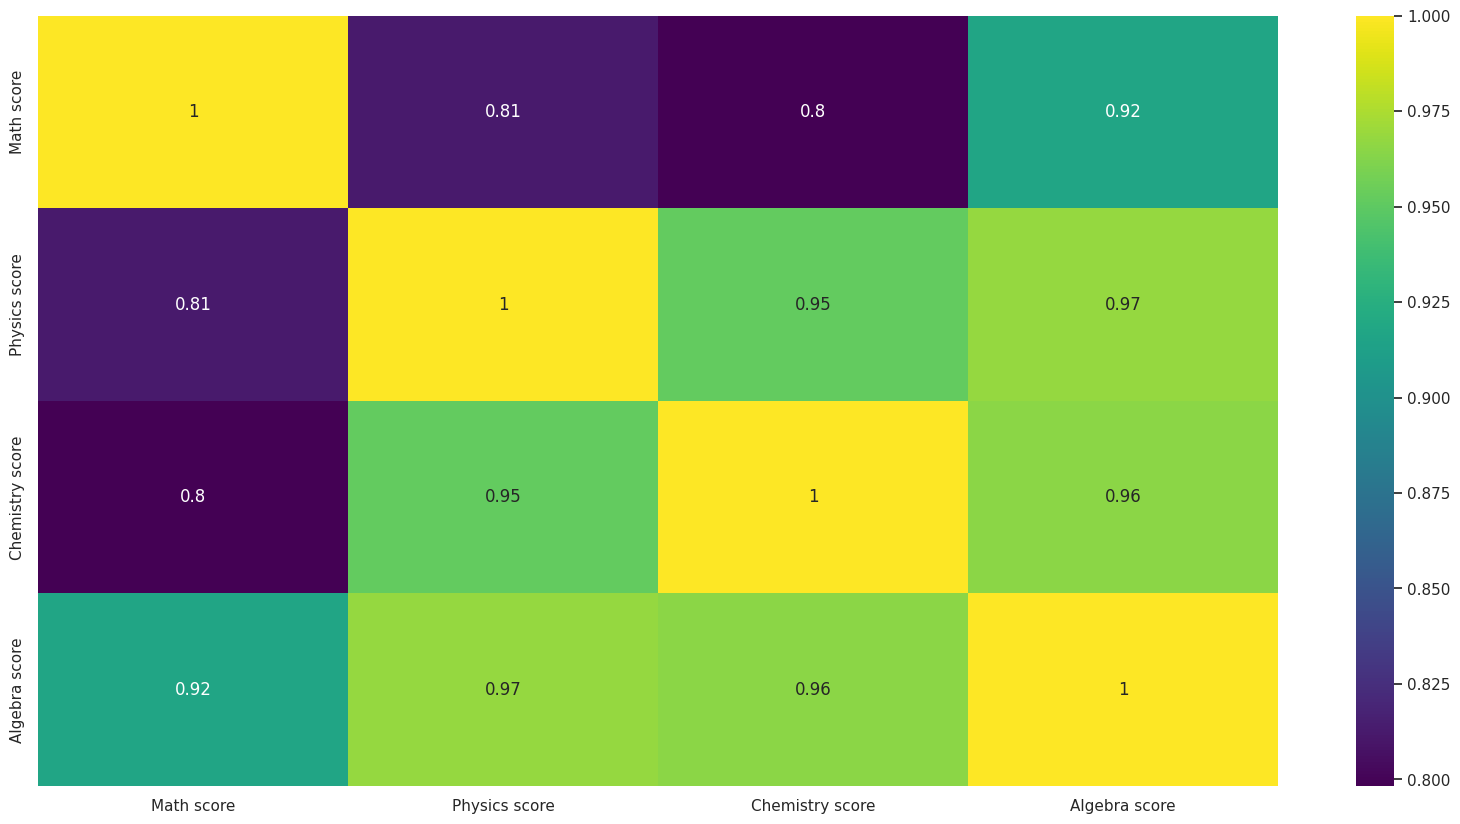

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(c, cmap="viridis", annot=True)
plt.show()

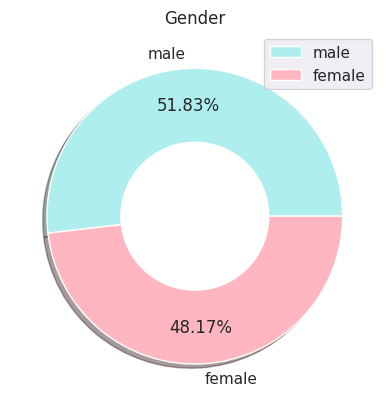

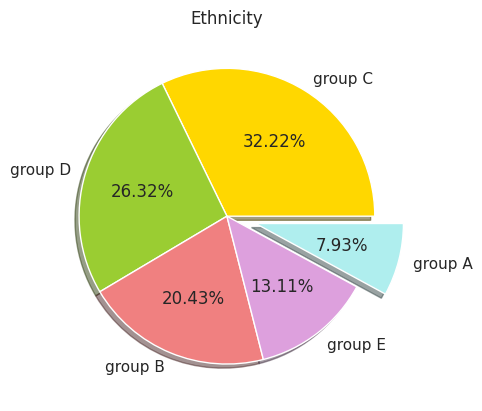

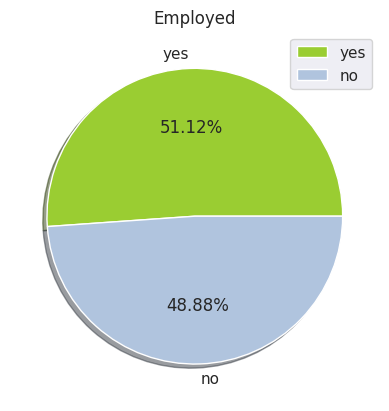

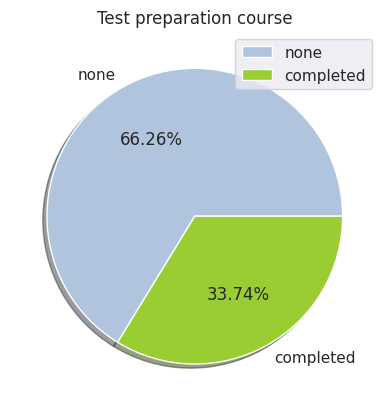

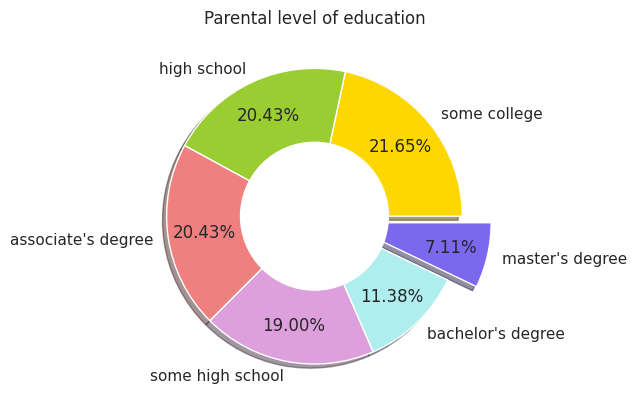

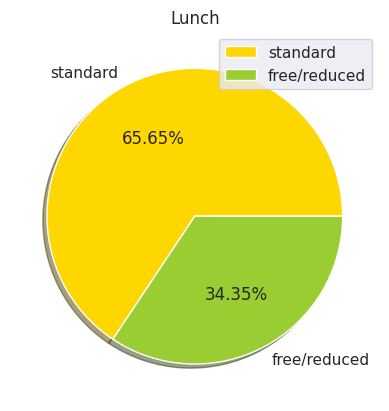

In [19]:
# Gráficas para variables categóricas
# pandas.values_count() -> devuelve una Serie con valores únicos en un orden descendente de frecuencia
labels = df['Gender'].value_counts().index
sizes = df['Gender'].value_counts()
c = ['paleturquoise', 'lightpink']
plt.pie(sizes, labels=labels, colors=c, autopct='%1.2f%%', pctdistance = 0.75, shadow=True)
plt.title('Gender')
cc = plt.Circle((0,0), 0.5, fc='white')
fig=plt.gcf()
fig.gca().add_artist(cc)
plt.savefig('plot.png', dpi=300)
plt.legend(loc="upper right")
plt.show()

# Repetimos para el resto de las variables categóricas
labels = df['Ethnicity'].value_counts().index
sizes = df['Ethnicity'].value_counts()
c = ['gold', 'yellowgreen', 'lightcoral', 'plum','paleturquoise']
e = (0,0,0,0,0.2)
plt.pie(sizes, explode = e, labels=labels, colors=c, autopct='%1.2f%%', shadow=True)
plt.title('Ethnicity')
plt.show()

labels = df['Employed'].value_counts().index
sizes = df['Employed'].value_counts()
c = ['yellowgreen', 'lightsteelblue']
plt.pie(sizes, labels=labels, colors=c, autopct='%1.2f%%', shadow=True)
plt.title('Employed')
plt.legend(loc="upper right")
plt.show()

labels = df['Test preparation course'].value_counts().index
sizes = df['Test preparation course'].value_counts()
c = ['lightsteelblue', 'yellowgreen']
plt.pie(sizes, labels=labels, colors=c, autopct='%1.2f%%', shadow=True)
plt.title('Test preparation course')
plt.legend(loc="upper right")
plt.show()

labels = df['Parental level of education'].value_counts().index
sizes = df['Parental level of education'].value_counts()
c = ['gold', 'yellowgreen', 'lightcoral', 'plum','paleturquoise', 'mediumslateblue']
e = (0,0,0,0,0,0.2)
plt.pie(sizes, explode=e, labels=labels, colors=c, autopct='%1.2f%%', pctdistance = 0.75, shadow=True)
plt.title('Parental level of education')
cc = plt.Circle((0,0), 0.5, fc='white')
fig=plt.gcf()
fig.gca().add_artist(cc)
plt.savefig('plot.png', dpi=300)
plt.show()

labels = df['Lunch'].value_counts().index
sizes = df['Lunch'].value_counts()
c = ['gold', 'yellowgreen']
plt.pie(sizes, labels=labels, colors=c, autopct='%1.2f%%', shadow=True)
plt.title('Lunch')
plt.legend(loc="upper right")
plt.show()


## Respondiendo preguntas

<center><img src='imagen_conclusiones.jpg' width=400></center>

### Pregunta 1 (ejemplo del video): ¿Hay alguna relación entre el promedio de notas obtenidas y el hecho de haber realizado el curso preparatorio?

In [20]:
df['Average Score'] = df.mean(axis=1)  # creo esta nueva columna "Average Score"
# axis = 1 -> hace que aplique la función sobre los valores numéricos de la fila, en lugar de las columnas (es decir, busca el promedio en el eje horizontal -axis 1-)
df

,Gender,Ethnicity,Parental level of education,Lunch,Employed,Test preparation course,Math score,Physics score,Chemistry score,Algebra score,Average Score
0,male,group A,high school,standard,yes,completed,67.0,67.0,63.0,66.0,65.75
1,female,group D,some high school,free/reduced,no,none,40.0,59.0,55.0,51.0,51.25
2,male,group E,some college,free/reduced,no,none,59.0,60.0,50.0,56.0,56.25
3,male,group B,high school,standard,yes,none,77.0,78.0,68.0,74.0,74.25
4,male,group E,associate's degree,standard,yes,completed,78.0,73.0,68.0,73.0,73.00
...,...,...,...,...,...,...,...,...,...,...,...
1001,male,group C,high school,standard,yes,none,73.0,70.0,65.0,69.0,69.25
1002,male,group D,associate's degree,free/reduced,no,completed,85.0,91.0,92.0,89.0,89.25
1003,female,group C,some high school,free/reduced,yes,none,32.0,35.0,41.0,36.0,36.00
1004,female,group C,some college,standard,yes,none,73.0,74.0,82.0,76.0,76.25


In [21]:
si = df[df['Test preparation course'] == 'completed']
no = df[df['Test preparation course'] == 'none']

Realizaron el curso: 332 alumnos.
No realizaron el curso: 652 alumnos.


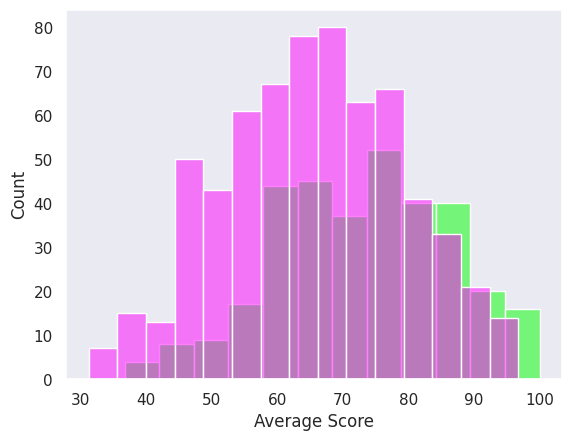

In [22]:
print('Realizaron el curso:', si['Test preparation course'].count(), 'alumnos.')
print('No realizaron el curso:', no['Test preparation course'].count(), 'alumnos.')

sns.set(style='dark')
sns.histplot(si['Average Score'], color = 'lime', alpha = .5, fill = True)
sns.histplot(no['Average Score'], color = 'fuchsia', alpha = .5, fill = True)
plt.show()

Conclusión: si bien, la cantidad de alumnos que no realizó el curso preparatorio duplica, casi, a la de quienes lo han completado, esta diferencia no se ve reflejada, significativamente, en el promedio de notas. 

Recomendación: podrían auditarse los contenidos del curso, a fines de lograr una mejora en el rendimiento académico y, así, incrementar el interés del alumnado.

### Pregunta 2: ¿Existe correspondencia entre el grupo étnico y el promedio de notas alcanzado?

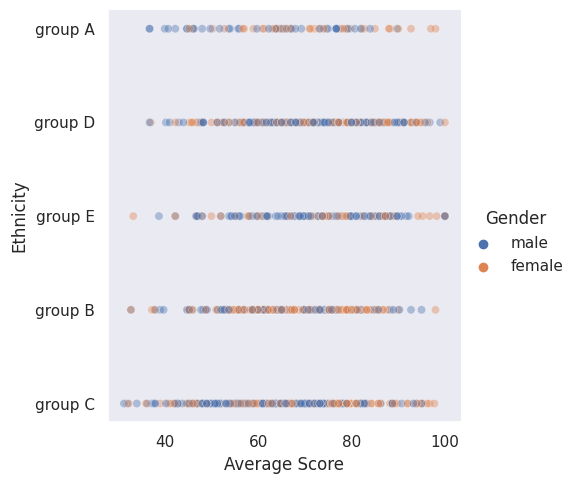

In [23]:

sns.relplot(x = 'Average Score', hue='Gender', y='Ethnicity', alpha=.4, data=df)


In [24]:
# Cuento la cantidad de alumnos dentro de cada grupo étnico y, dentro de cada uno de estos grupos, saco el promedio de notas (teniendo en cuenta el Average Score).
grupoA = df[df['Ethnicity'] == 'group A']
grupoB = df[df['Ethnicity'] == 'group B']
grupoC = df[df['Ethnicity'] == 'group C']
grupoD = df[df['Ethnicity'] == 'group D']
grupoE = df[df['Ethnicity'] == 'group E']
print('Cantidad de alumnos Group A:', grupoA['Ethnicity'].count())
print('Cantidad de alumnos Group B:', grupoB['Ethnicity'].count())
print('Cantidad de alumnos Group C:', grupoC['Ethnicity'].count())
print('Cantidad de alumnos Group D:', grupoD['Ethnicity'].count())
print('Cantidad de alumnos Group E:', grupoE['Ethnicity'].count())
grupoA_total = np.sum(grupoA['Average Score'].mean())
grupoB_total = np.sum(grupoB['Average Score'].mean())
grupoC_total = np.sum(grupoC['Average Score'].mean())
grupoD_total = np.sum(grupoD['Average Score'].mean())
grupoE_total = np.sum(grupoE['Average Score'].mean())
print(f'Promedio de calificaciones de alumnos Group A: {grupoA_total:.2f}')
print(f'Promedio de calificaciones de alumnos Group B: {grupoB_total:.2f}')
print(f'Promedio de calificaciones de alumnos Group C: {grupoC_total:.2f}')
print(f'Promedio de calificaciones de alumnos Group D: {grupoD_total:.2f}')
print(f'Promedio de calificaciones de alumnos Group E: {grupoE_total:.2f}')


Cantidad de alumnos Group A: 78
Cantidad de alumnos Group B: 201
Cantidad de alumnos Group C: 317
Cantidad de alumnos Group D: 259
Cantidad de alumnos Group E: 129
Promedio de calificaciones de alumnos Group A: 66.57
Promedio de calificaciones de alumnos Group B: 66.03
Promedio de calificaciones de alumnos Group C: 65.22
Promedio de calificaciones de alumnos Group D: 71.29
Promedio de calificaciones de alumnos Group E: 72.41


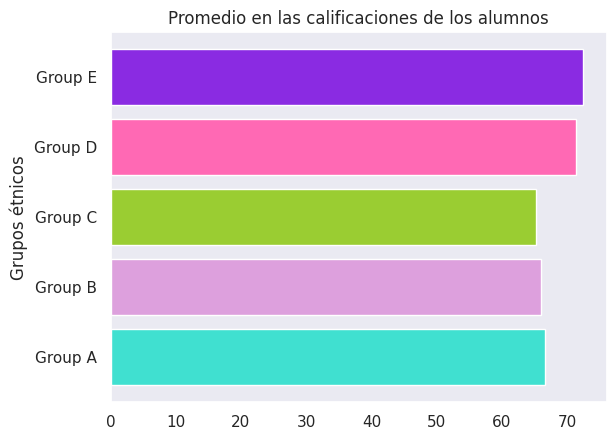

In [25]:
grupos = ['Group A', 'Group B', 'Group C', 'Group D', 'Group E']
promedio = [grupoA_total, grupoB_total, grupoC_total, grupoD_total, grupoE_total]
plt.barh(grupos, promedio, color=['turquoise', 'plum', 'yellowgreen', 'hotpink', 'blueviolet'])
plt.ylabel("Grupos étnicos")
plt.title("Promedio en las calificaciones de los alumnos")
plt.show()


Conclusión: los grupos E y D poseen un promedio general mayor en las calificaciones. Mientras que, los 3 grupos étnicos restantes (A, B, C) alcanzan un promedio menor y bastante parecido entre ellos.

Recomendación: generar acciones (de acompañamiento académico) que fortalezcan las competencias y habilidades de los alumnos que pertenecen a los grupos étnicos con menores calificaciones. 

### Pregunta 3: ¿Existe relación entre el promedio de notas obtenidas y el hecho de que los alumnos trabajen o no?

Trabajan: 503 alumnos.
No trabajan: 481 alumnos.


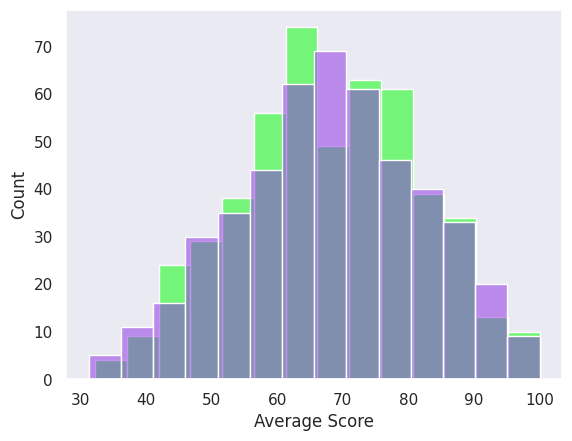

In [26]:
trabaja = df[df['Employed'] == 'yes']
noTrabaja = df[df['Employed'] == 'no']

print('Trabajan:', trabaja['Employed'].count(), 'alumnos.')
print('No trabajan:', noTrabaja['Employed'].count(), 'alumnos.')

sns.histplot(trabaja['Average Score'], color = 'lime', alpha = .5, fill = True)
sns.histplot(noTrabaja['Average Score'], color = 'blueviolet', alpha = .5, fill = True)
plt.show()

In [27]:
# Cuento la cantidad de alumnos que trabajan y los que no trabajan y, dentro de cada uno de estos grupos, saco el promedio de notas (teniendo en cuenta el Average Score).
trabaja_total = np.sum(trabaja['Average Score']) / trabaja['Employed'].count()
noTrabaja_total = np.sum(noTrabaja['Average Score']) / noTrabaja['Employed'].count()
print(f'El promedio de notas de las personas que trabajan es: {trabaja_total:.2f}')
print(f'El promedio de notas de las personas que no trabajan es: {noTrabaja_total:.2f}')

El promedio de notas de las personas que trabajan es: 68.06
El promedio de notas de las personas que no trabajan es: 68.01


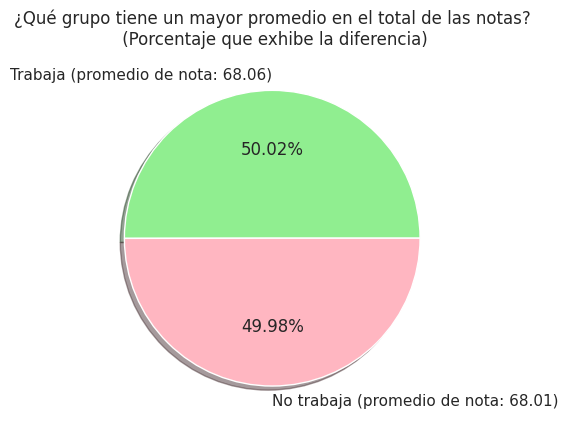

In [28]:
labels = [f'Trabaja (promedio de nota: {trabaja_total:.2f})', f'No trabaja (promedio de nota: {noTrabaja_total:.2f})']
sizes = [trabaja_total, noTrabaja_total]
c = ['lightgreen', 'lightpink']
plt.pie(sizes, labels=labels, colors=c, autopct='%1.2f%%', shadow=True)
plt.title('¿Qué grupo tiene un mayor promedio en el total de las notas?\n (Porcentaje que exhibe la diferencia)', loc = 'center')
plt.show()


Conclusión: si tenemos en cuenta el promedio total de las notas dentro de cada grupo (trabajadores y desempleados), no es posible advertir una diferencia significativa entre las mismas, ya que son prácticamente iguales. 

En suma, el hecho de trabajar no implica un menor desenvolvimiento académico.

Recomendación: sabiendo que el hecho de trabajar no genera una merma en las calificaciones, podrían generarse prácticas especiales para aquellos alumnos que no trabajan, para que -a la par de la cursada- puedan adquirir experiencia laboral en el ámbito de sus estudios.

### Pregunta 4: ¿Tienen mayor promedio los alumnos cuyos padres han alcanzado un nivel de estudio posuniversitario (en este caso, un "master degree")?

Padres que han alcanzado un máster: 70
Padres que no han alcanzado un máster: 914


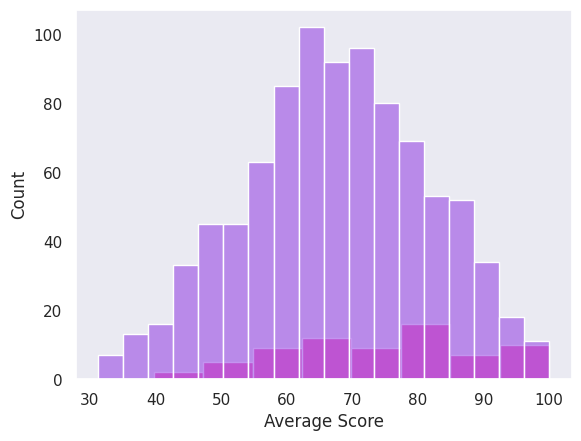

In [29]:
padres_master = df[df['Parental level of education'] == "master's degree" ]
padres_no_master = df[df['Parental level of education'] != "master's degree"]

print('Padres que han alcanzado un máster:', padres_master['Parental level of education'].count())
print('Padres que no han alcanzado un máster:', padres_no_master['Parental level of education'].count())

sns.histplot(padres_master['Average Score'], color = 'deeppink', alpha = .5, fill = True)
sns.histplot(padres_no_master['Average Score'], color = 'blueviolet', alpha = .5, fill = True)
plt.show()

In [30]:
# Cuento la cantidad de alumnos cuyos padres alcanzaron un máster y, dentro de cada uno de estos grupos, saco el promedio de notas (teniendo en cuenta el Average Score).
padres_master_total = np.sum(padres_master['Average Score'].mean())
padres_no_master_total = np.sum(padres_no_master['Average Score'].mean())
print(f'El promedio de notas de los alumnos con padres con máster es: {padres_master_total:.2f}')
print(f'El promedio de notas de los alumnos cuyos padres no alcanzaron un máster es: {padres_no_master_total:.2f}')

El promedio de notas de los alumnos con padres con máster es: 74.31
El promedio de notas de los alumnos cuyos padres no alcanzaron un máster es: 67.55


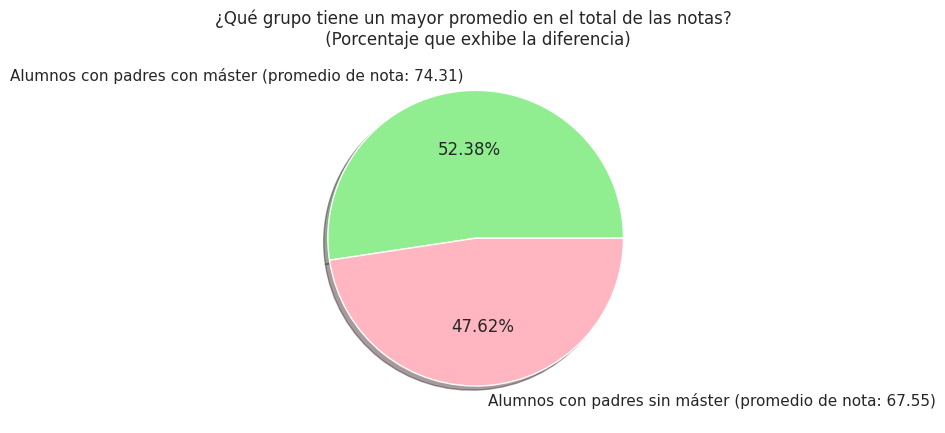

In [31]:
labels = [f'Alumnos con padres con máster (promedio de nota: {padres_master_total:.2f})', f'Alumnos con padres sin máster (promedio de nota: {padres_no_master_total:.2f})']
sizes = [padres_master_total, padres_no_master_total]
c = ['lightgreen', 'lightpink']
plt.pie(sizes, labels=labels, colors=c, autopct='%1.2f%%', shadow=True)
plt.title('¿Qué grupo tiene un mayor promedio en el total de las notas? \n (Porcentaje que exhibe la diferencia)', loc = 'center')
plt.show()

Conclusión: puede advertirse una superioridad en el promedio total de las calificaciones de los alumnos, de quienes algunos de sus padres han alcanzado un grado académico de máster (74.31), frente al de los alumnos cuyos padres tienen un grado académico menor (67.55).

Recomendación: adoptar programas de incentivos para los alumnos (por ejemplo, mentorías) que puedan robustecer su confianza y sus destrezas en el estudio, para que esta diferencia pueda reducirse. Y, de esta forma, que este tipo de estímulos externos -más allá de la familia- les permitan mejorar sus calificaciones.

### Pregunta 5:  De acuerdo al género, ¿existen diferencias en las calificaciones?

Varones: 510
Mujeres: 474


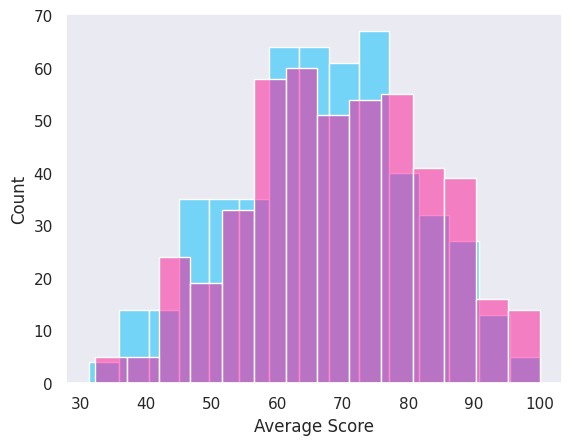

In [32]:
varones = df[df['Gender'] == "male" ]
mujeres = df[df['Gender'] == "female" ]

print('Varones:', varones['Gender'].count())
print('Mujeres:', mujeres['Gender'].count())

sns.histplot(varones['Average Score'], color = 'deepskyblue', alpha = .5, fill = True)
sns.histplot(mujeres['Average Score'], color = 'deeppink', alpha = .5, fill = True)
plt.show()

In [33]:
# Cuento la cantidad de alumnos en cada género y, dentro de cada uno de estos grupos, saco el promedio de notas (teniendo en cuenta el Average Score).
varones_total = np.sum(varones['Average Score'].mean())
mujeres_total = np.sum(mujeres['Average Score'].mean())
print(f'El promedio de notas de los alumnos varones es: {varones_total:.2f}')
print(f'El promedio de notas de las alumnas mujeres es: {mujeres_total:.2f}')

El promedio de notas de los alumnos varones es: 66.80
El promedio de notas de las alumnas mujeres es: 69.37


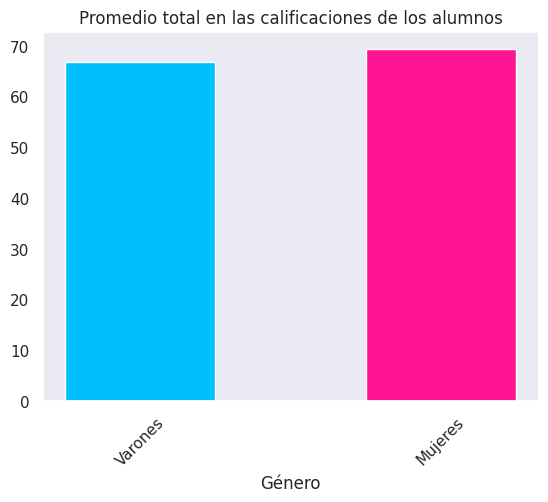

In [34]:
grupos = ['Varones', 'Mujeres']
promedio = [varones_total, mujeres_total]
plt.bar(grupos, promedio, width = 0.5, color=['deepskyblue', 'deeppink'])
plt.xticks(np.arange(2), ('Varones', 'Mujeres'), rotation = 45)
plt.xlabel("Género")
plt.title("Promedio total en las calificaciones de los alumnos")
plt.show()

Conclusión: puede observarse que el promedio general de calificaciones de las mujeres (69.37) es mayor al propio de los varones (66.80).

Información adicional: en consonancia con las  recomendaciones expuestas en las conclusiones de este apartado, en el sitio oficial del BID se describen acciones desarrolladas en la región, que permiten fortalecer las habilidades de los estudiantes como, también, su inserción en el ámbito laboral.                                                                                                                                                                   

 María Inés Abarrategui Fernández Linkedin

(Trabajo presentado en el curso "Big Data". Codo a Codo 4.0, 2° cuatrimestre, 2022)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b2d12790-8256-4f00-8456-fc5325c70b9d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>